In [84]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
!pip install livelossplot

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17688749691643349085
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14221454830038988217
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6284573640191686735
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14842344244
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11408876247045948124
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


2021-09-08 12:48:37.053983: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2021-09-08 12:48:37.054795: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55fd1d24c5c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-08 12:48:37.054823: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-08 12:48:37.056344: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-09-08 12:48:37.794583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-08 12:48:37.795244: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55fd1b9d3510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-09-0

In [4]:
#import keras
#import tensorflow as tf
#config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 4} ) 
#sess = tf.compat.v1.Session(config=config) 
#keras.backend.set_session(sess)

2021-09-08 08:34:49.539202: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2021-09-08 08:34:49.539712: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557852a6f0b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-08 08:34:49.539745: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-08 08:34:49.543397: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-09-08 08:34:50.332990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-08 08:34:50.333861: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5578512dfbd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-09-0

## load the data

### action data

In [44]:
# last column in action_filttune is the origin in filttune
action_CST_500 = np.loadtxt('data/action_in_CST_matrix_rand_seed500.csv',delimiter=',')
action_filttune_full_500 = np.loadtxt('data/action_in_filttune_matrix_19_seed500.csv',delimiter=',')

action_CST_900 = np.loadtxt('data/action_in_CST_matrix_rand_seed900.csv',delimiter=',')
action_filttune_full_900 = np.loadtxt('data/action_in_filttune_matrix_19_seed900.csv',delimiter=',')

action_CST_1000 = np.loadtxt('data/action_in_CST_matrix_rand_seed1000.csv',delimiter=',')
action_filttune_full_1000 = np.loadtxt('data/action_in_filttune_matrix_19_seed1000.csv',delimiter=',')

action_CST_1100 = np.loadtxt('data/action_in_CST_matrix_rand_seed1100.csv',delimiter=',')
action_filttune_full_1100 = np.loadtxt('data/action_in_filttune_matrix_19_seed1100.csv',delimiter=',')

In [45]:
action_filttune_500 = action_filttune_full_500[:,0:3201]

action_filttune_900  = action_filttune_full_900[:,0:1083]
action_filttune_1000 = action_filttune_full_1000[:,0:1068]
action_filttune_1100 = action_filttune_full_1100[:,0:2910]

### cmp and screw position

In [59]:
SP_500 = np.loadtxt('data/screw_position_CST_matrix_random_500.csv',delimiter=',')
#cmp_full_500 = np.loadtxt('data/cmp_matrix_19_seed500.csv',delimiter=',')

SP_900 = np.loadtxt('data/screw_position_CST_matrix_random_900.csv',delimiter=',')
cmp_full_900 = np.loadtxt('data/cmp_matrix_19_seed900.csv',delimiter=',')

SP_1000 = np.loadtxt('data/screw_position_CST_matrix_random_1000.csv',delimiter=',')
cmp_full_1000 = np.loadtxt('data/cmp_matrix_19_seed1000.csv',delimiter=',')

SP_1100 = np.loadtxt('data/screw_position_CST_matrix_random_1100.csv',delimiter=',')
cmp_full_1100 = np.loadtxt('data/cmp_matrix_19_seed1100.csv',delimiter=',')

In [67]:
cmp_500 = (action_filttune_500.transpose() + action_filttune_full_500[:,3201]).transpose()

cmp_900  = cmp_full_900[:,0:1083]
cmp_1000 = cmp_full_1000[:,0:1068]
cmp_1100 = cmp_full_1100[:,0:2910]

In [77]:
SP_1000[:,-1]

array([ 0.05237951,  1.40323185,  0.45717698,  1.62236941,  0.86922861,
        1.30648692,  0.64812832,  0.52867434,  2.52954024, -1.28398352,
        1.12461483,  1.55529156, -2.24853122,  0.35181884,  3.3748146 ,
        0.26362294, -0.17300691,  0.8903241 , -0.52809354])

### add some golden data

In [104]:
cmp_origin = np.loadtxt('data/cmp_origin_19.csv',delimiter=',')
cst_origin = np.loadtxt('data/cst_origin_19.csv',delimiter=',')

## load the RMSE data

In [117]:
#load the RMSE data.
#1st row: rmse; 2nd row: mrse
RMS_500  = np.loadtxt('data/RMS_seed500.csv',delimiter=',')
RMS_900  = np.loadtxt('data/RMS_seed900.csv',delimiter=',')
RMS_1000 = np.loadtxt('data/RMS_seed1000.csv',delimiter=',')
RMS_1100 = np.loadtxt('data/RMS_seed1100.csv',delimiter=',')

## Seed 500 complete

In [111]:
SP_500_origin = np.concatenate((SP_500, cst_origin),axis = 1)
cmp_500_origin = np.concatenate((cmp_500, cmp_origin),axis = 1)

In [112]:
X_train_500, X_test_500, y_train_500, y_test_500 = train_test_split(SP_500_origin.transpose(), 
                                                                    cmp_500_origin.transpose(), random_state=1,train_size = 0.8)

#### build the model and train

In [ ]:
'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 'auto',
 'hidden_layer_sizes': (300, 300, 300),
 'learning_rate': 'adaptive',
 'solver': 'adam'

In [125]:
from tensorflow.keras.models import Sequential,load_model, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1, l1_l2

from livelossplot import PlotLossesKeras

##### so far the best

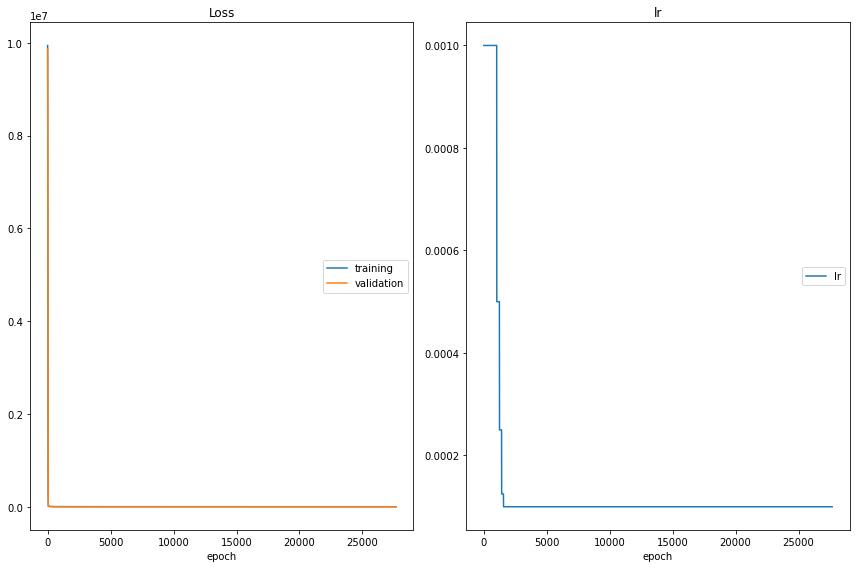

Loss
	training         	 (min: 1157.483, max: 9942293.691, cur: 1185.108)
	validation       	 (min:  783.227, max: 9870785.940, cur:  787.188)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
2576/2576 [==============================] - 1s 309us/sample - loss: 1185.1079 - val_loss: 787.1885
Epoch 27670/60000
 864/2576 [=========>....................] - ETA: 0s - loss: 1168.4033

In [ ]:
input_shape = (19,)

model_abs_500 = Sequential()
model_abs_500.add(Dense(300, input_shape=input_shape, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.05)))
model_abs_500.add(Dropout(0.2))
model_abs_500.add(BatchNormalization())
model_abs_500.add(Dense(300, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.1)))
model_abs_500.add(Dropout(0.2))
model_abs_500.add(BatchNormalization())
model_abs_500.add(Dense(300, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.1)))
model_abs_500.add(Dropout(0.2))
model_abs_500.add(BatchNormalization())
model_abs_500.add(Dense(19, activation='linear', 
                        kernel_regularizer=regularizers.l2(0.1)))

# Configure the model and start training
model_abs_500.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model_abs/model_500_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_abs_500.fit(X_train_500, y_train_500, epochs=60000, 
                  batch_size = 36, verbose=1, validation_data = (X_test_500,y_test_500), #validation_split=0.2,
                  callbacks=callbacks_list)

#### normalize the targets

In [218]:
from sklearn.preprocessing import MinMaxScaler

target_scaler = MinMaxScaler()
target_scaler.fit(y_train_500)

X_train_500_minmax = 10*target_scaler.transform(X_train_500)
X_test_500_minmmax = 10*target_scaler.transform(X_test_500)

y_train_500_minmax = 10*target_scaler.transform(y_train_500)
y_test_500_minmax = 10*target_scaler.transform(y_test_500)

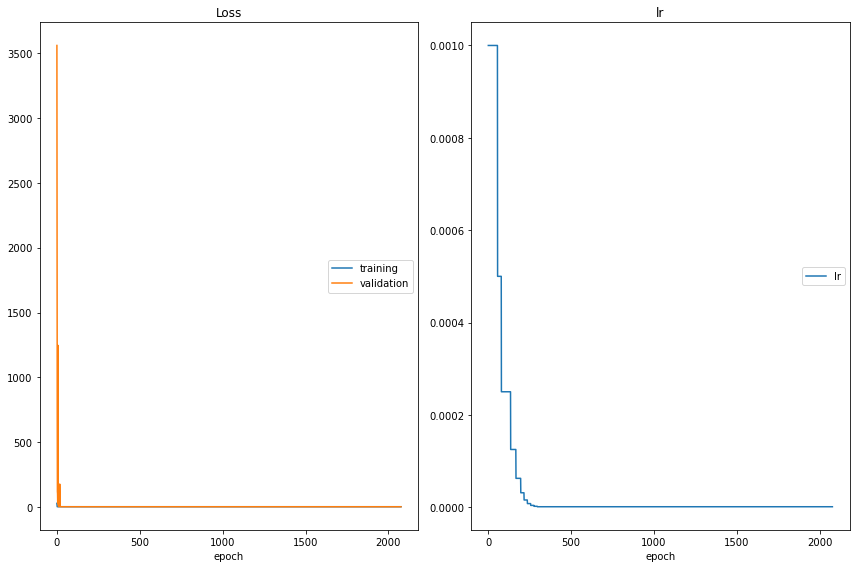

Loss
	training         	 (min:    3.100, max:   29.132, cur:    3.101)
	validation       	 (min:    3.069, max: 3558.400, cur:    3.071)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
2560/2560 [==============================] - 2s 856us/sample - loss: 3.1006 - val_loss: 3.0713
Epoch 2078/50000
1764/2560 [===================>..........] - ETA: 0s - loss: 3.0918

In [ ]:
input_shape = (19,)

model_minmax.add(Dense(400, input_shape=input_shape, activation='relu'))
#model_minmax.add(Dropout(0.02))
model_minmax.add(BatchNormalization())
model_minmax.add(Dense(400, activation='relu'))
#model_minmax.add(Dropout(0.02))
model_minmax.add(BatchNormalization())
model_minmax.add(Dense(400, activation='relu'))
#model_minmax.add(Dropout(0.02))
model_minmax.add(BatchNormalization())
model_minmax.add(Dense(19, activation='linear'))

# Configure the model and start training
model_minmax.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.000001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_500_minmax_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_minmax.fit(X_train_500_minmax, y_train_500_minmax, epochs=50000, batch_size = 36, verbose=1, validation_data = (X_test_500_minmmax,y_test_500_minmax), #validation_split=0.2,
            callbacks=callbacks_list)

#### MSE and R2 score for minmax

In [203]:
y_train_predict_500 = model_minmax.predict(X_train_500_minmax)
y_test_predict_500 = model_minmax.predict(X_test_500_minmmax)

In [204]:
mse_train_500 = metrics.mean_squared_error(y_train_500_minmax, y_train_predict_500)
mse_test_500 = metrics.mean_squared_error(y_test_500_minmax, y_test_predict_500)

r2_train_500 = r2_score(y_train_500_minmax, y_train_predict_500)
r2_test_500 = r2_score(y_test_500_minmax, y_test_predict_500)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_500))
print('MSE test is {}'.format(mse_test_500))
print('R2 train is {}'.format(r2_train_500))
print('R2 test is {}'.format(r2_test_500))

The model performance for testing set
--------------------------------------
MSE train is 0.031003251512883974
MSE test is 0.030715263974686848
R2 train is -0.000152967329086154
R2 test is -0.003006113271485355


In [199]:
y_train_predict_500_inv = target_scaler.inverse_transform(y_train_predict_500)
y_test_predict_500_inv = target_scaler.inverse_transform(y_test_predict_500)

In [200]:
mse_train_500 = metrics.mean_squared_error(y_train_500, y_train_predict_500_inv)
mse_test_500 = metrics.mean_squared_error(y_test_500, y_test_predict_500_inv)

r2_train_500 = r2_score(y_train_500, y_train_predict_500_inv)
r2_test_500 = r2_score(y_test_500, y_test_predict_500_inv)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_500))
print('MSE test is {}'.format(mse_test_500))
print('R2 train is {}'.format(r2_train_500))
print('R2 test is {}'.format(r2_test_500))

The model performance for testing set
--------------------------------------
MSE train is 7430.018798331819
MSE test is 7310.410099662353
R2 train is -0.0006605805039751348
R2 test is -0.0031904826334089365


#### MSE and R2 score

In [114]:
y_train_predict_500 = model_abs_500.predict(X_train_500)
y_test_predict_500 = model_abs_500.predict(X_test_500)

In [115]:
mse_train_500 = metrics.mean_squared_error(y_train_500, y_train_predict_500)
mse_test_500 = metrics.mean_squared_error(y_test_500, y_test_predict_500)

r2_train_500 = r2_score(y_train_500, y_train_predict_500)
r2_test_500 = r2_score(y_test_500, y_test_predict_500)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_500))
print('MSE test is {}'.format(mse_test_500))
print('R2 train is {}'.format(r2_train_500))
print('R2 test is {}'.format(r2_test_500))

The model performance for testing set
--------------------------------------
MSE train is 102.25556180991386
MSE test is 239.61501065274507
R2 train is 0.791565755997088
R2 test is 0.659791286824768


## Complete_small dataset

### Select the data with RMSE<0.09

In [118]:
index_500 = range(action_CST_500.shape[1])
temp_500 = RMS_500[0,:]>0.09
to_delete_500 = index_500*temp_500
to_delete_500 = [i for i in to_delete_500 if i != 0]

index_900 = range(action_CST_900.shape[1])
temp_900 = RMS_900[0,:]>0.09
to_delete_900 = index_900*temp_900
to_delete_900 = [i for i in to_delete_900 if i != 0]

index_1000 = range(action_CST_1000.shape[1])
temp_1000 = RMS_1000[0,:]>0.09
to_delete_1000 = index_1000*temp_1000
to_delete_1000 = [i for i in to_delete_1000 if i != 0]

index_1100 = range(action_CST_1100.shape[1])
temp_1100 = RMS_1100[0,:]>0.09
to_delete_1100 = index_1100*temp_1100
to_delete_1100 = [i for i in to_delete_1100 if i != 0]

In [119]:
SP_500_small  = np.delete(SP_500, to_delete_500,  axis=1)
SP_900_small  = np.delete(SP_900, to_delete_900,  axis=1)
SP_1000_small = np.delete(SP_1000, to_delete_1000,  axis=1)
SP_1100_small = np.delete(SP_1100, to_delete_1100,  axis=1)

cmp_500_small   = np.delete(cmp_500, to_delete_500,  axis=1)
cmp_900_small   = np.delete(cmp_900, to_delete_900,  axis=1)
cmp_1000_small  = np.delete(cmp_1000, to_delete_1000,  axis=1)
cmp_1100_small  = np.delete(cmp_1100, to_delete_1100,  axis=1)

In [120]:
SP_small = np.concatenate((SP_500_small,SP_900_small,
                              SP_1000_small,SP_1100_small),axis = 1)
cmp_small = np.concatenate((cmp_500_small,cmp_900_small, 
                                   cmp_1000_small, cmp_1100_small),axis = 1)

In [121]:
SP_small_origin = np.concatenate((SP_small, cst_origin),axis = 1)
cmp_small_origin = np.concatenate((cmp_small, cmp_origin),axis = 1)

In [122]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split( 
    SP_small_origin.transpose(), cmp_small_origin.transpose(), random_state=1,train_size = 0.8)

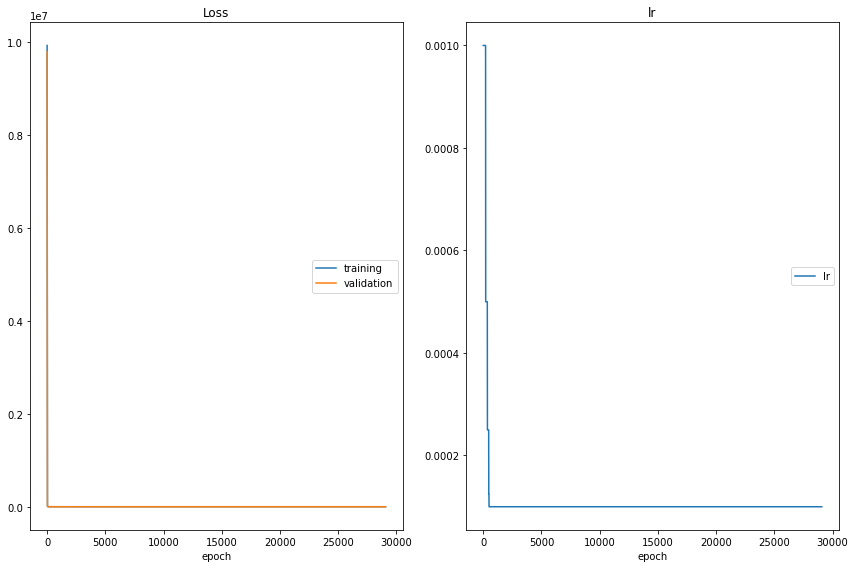

Loss
	training         	 (min:  426.034, max: 9924187.136, cur:  434.925)
	validation       	 (min:  199.875, max: 9789771.076, cur:  268.596)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
4868/4868 [==============================] - 1s 239us/sample - loss: 434.9254 - val_loss: 268.5963
Epoch 29074/60000
4788/4868 [============================>.] - ETA: 0s - loss: 449.5359
Epoch 29074: loss did not improve from 426.03397


In [ ]:
# Set the input shape
input_shape = (19,)
print(f'Feature shape: {input_shape}')

# Create the model
model_comp_small_0 = Sequential()
model_comp_small_0.add(Dense(300, input_shape=input_shape, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model_comp_small_0.add(Dropout(0.1))
model_comp_small_0.add(BatchNormalization())
model_comp_small_0.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model_comp_small_0.add(Dropout(0.1))
model_comp_small_0.add(BatchNormalization())
model_comp_small_0.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model_comp_small_0.add(Dropout(0.1))
model_comp_small_0.add(BatchNormalization())
model_comp_small_0.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))

# Configure the model and start training
model_comp_small_0.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model_abs/model_comp_small_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_comp_small_0.fit(X_train_small, y_train_small, epochs=60000, 
                  batch_size = 36, verbose=1, validation_data = (X_test_small,y_test_small), #validation_split=0.2,
                  callbacks=callbacks_list)

#### normalize the targets

In [138]:
from sklearn.preprocessing import MinMaxScaler

target_scaler_X = MinMaxScaler()
target_scaler_X.fit(X_train_small)

target_scaler_y = MinMaxScaler()
target_scaler_y.fit(y_train_small)

X_train_small_minmax = target_scaler_X.transform(X_train_small)
X_test_small_minmmax = target_scaler_X.transform(X_test_small)

y_train_small_minmax = target_scaler_y.transform(y_train_small)
y_test_small_minmax = target_scaler_y.transform(y_test_small)

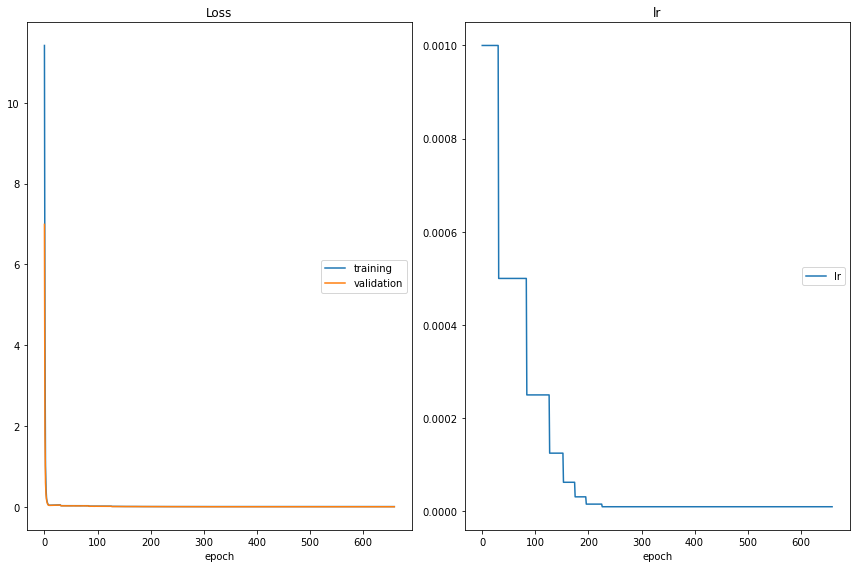

Loss
	training         	 (min:    0.011, max:   11.417, cur:    0.012)
	validation       	 (min:    0.008, max:    6.992, cur:    0.008)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
4868/4868 [==============================] - 1s 245us/sample - loss: 0.0115 - val_loss: 0.0079
Epoch 661/60000
2088/4868 [===========>..................] - ETA: 0s - loss: 0.0114

In [ ]:
# Set the input shape
input_shape = (19,)
print(f'Feature shape: {input_shape}')

# Create the model
model_comp_small_minmax_0 = Sequential()
model_comp_small_minmax_0.add(Dense(300, input_shape=input_shape, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model_comp_small_minmax_0.add(Dropout(0.1))
model_comp_small_minmax_0.add(BatchNormalization())
model_comp_small_minmax_0.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model_comp_small_minmax_0.add(Dropout(0.1))
model_comp_small_minmax_0.add(BatchNormalization())
model_comp_small_minmax_0.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model_comp_small_minmax_0.add(Dropout(0.1))
model_comp_small_minmax_0.add(BatchNormalization())
model_comp_small_minmax_0.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))

# Configure the model and start training
model_comp_small_minmax_0.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.00001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model_abs/model_comp_small_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_comp_small_minmax_0.fit(X_train_small_minmax, y_train_small_minmax, epochs=60000, 
                  batch_size = 36, verbose=1, validation_data = (X_test_small_minmmax,y_test_small_minmax), #validation_split=0.2,
                  callbacks=callbacks_list)

In [171]:
model_comp_small_minmax_0 = load_model('model_abs/model_comp_small_0.h5')

#### MSE and R2 score for minmax

In [172]:
y_train_predict_small = model_comp_small_minmax_0.predict(X_train_small_minmax)
y_test_predict_small = model_comp_small_minmax_0.predict(X_test_small_minmmax)

In [173]:
mse_train_small_minmax = metrics.mean_squared_error(y_train_small_minmax, y_train_predict_small)
mse_test_small_minmax = metrics.mean_squared_error(y_test_small_minmax, y_test_predict_small)

r2_train_small_minmax = r2_score(y_train_small_minmax, y_train_predict_small)
r2_test_small_minmax = r2_score(y_test_small_minmax, y_test_predict_small)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_small_minmax))
print('MSE test is {}'.format(mse_test_small_minmax))
print('R2 train is {}'.format(r2_train_small_minmax))
print('R2 test is {}'.format(r2_test_small_minmax))

The model performance for testing set
--------------------------------------
MSE train is 0.003394324670886734
MSE test is 0.003256153264505058
R2 train is 0.581560826115072
R2 test is 0.5861122106955252


In [199]:
y_train_predict_500_inv = target_scaler.inverse_transform(y_train_predict_500)
y_test_predict_500_inv = target_scaler.inverse_transform(y_test_predict_500)

In [200]:
mse_train_500 = metrics.mean_squared_error(y_train_500, y_train_predict_500_inv)
mse_test_500 = metrics.mean_squared_error(y_test_500, y_test_predict_500_inv)

r2_train_500 = r2_score(y_train_500, y_train_predict_500_inv)
r2_test_500 = r2_score(y_test_500, y_test_predict_500_inv)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_500))
print('MSE test is {}'.format(mse_test_500))
print('R2 train is {}'.format(r2_train_500))
print('R2 test is {}'.format(r2_test_500))

The model performance for testing set
--------------------------------------
MSE train is 7430.018798331819
MSE test is 7310.410099662353
R2 train is -0.0006605805039751348
R2 test is -0.0031904826334089365


#### MSE and R2 score

In [127]:
y_train_predict_small = model_comp_small_0.predict(X_train_small)
y_test_predict_small = model_comp_small_0.predict(X_test_small)

In [128]:
mse_train_small = metrics.mean_squared_error(y_train_small, y_train_predict_small)
mse_test_small = metrics.mean_squared_error(y_test_small, y_test_predict_small)

r2_train_small = r2_score(y_train_small, y_train_predict_small)
r2_test_small = r2_score(y_test_small, y_test_predict_small)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_small))
print('MSE test is {}'.format(mse_test_small))
print('R2 train is {}'.format(r2_train_small))
print('R2 test is {}'.format(r2_test_small))

The model performance for testing set
--------------------------------------
MSE train is 105.61064686543467
MSE test is 171.01548764037045
R2 train is 0.8566186541291935
R2 test is 0.7116777563376301
